In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import json
import matplotlib.pyplot as plt
import sklearn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score,auc, roc_curve
import sys

sys.path.append("../anomalydetection/code")

from anomalyDetector_lib import *

In [2]:
def load_data(window_size):
    
    aCDN = np.load("../data/data.npy")
    anomalyInformation = np.load("../data/condInput.npy")
    
    x,y,labels = apply_sliding_window(aCDN, anomalyInformation, window_size=window_size)
    
    return x,y,labels

def apply_sliding_window(X,aMetaInformation,window_size):
    
    
    return_x = np.zeros(shape=[X.shape[0]-window_size,window_size,X.shape[1]])
    return_y = np.zeros(shape=[X.shape[0]-window_size,X.shape[1]])
    return_label = np.zeros(shape=[X.shape[0]-window_size,1])
    
    for i in range(0, int(X.shape[0]-window_size)):
        return_x[i] = X[i:i+window_size]
        return_y[i] = X[i+window_size]
        return_label[i] = aMetaInformation[i+window_size]
        
    return return_x.reshape(-1,window_size,X.shape[1]), return_y.reshape(-1,X.shape[1]), return_label.reshape(-1,1)

## TCN Detector

In [4]:
training_data_config = {
    "window_size": 64,
    "batch_size": 32,
    "lr": 0.001,
    "epochs": 500,
    "train_size": 0.9,
    "val_size": 0.05,
    "test_size": 0.05,
    "patience": 150,
    "modified_loss": "minmax",
    "multivariates": 3
    
}

tcn_model_config = {
    "architecture": "TCN",
    "channels": 20,
    "num_layers": 2,
    "kernel_size": 5,
    "dropout": 0.5,
}     

In [5]:
x,y,labels = load_data(training_data_config["window_size"])

In [6]:
tcnAnomalyDetector = AnomalyDetector(training_data_config,tcn_model_config,(x,y,labels))

Device: cuda:0


Directory  ./  already exists
Validation loss decreased (inf --> 0.825453).  Saving model ...
Epoch 0: Train-Loss: 0.004255750682204962, Val-Loss: 0.002901822328567505, Val-AUC: 0.8254531557108539
Validation loss decreased (0.825453 --> 0.841286).  Saving model ...
Epoch 1: Train-Loss: 0.001793196890503168, Val-Loss: 0.002912066411226988, Val-AUC: 0.8412863070539419
Validation loss decreased (0.841286 --> 0.858812).  Saving model ...
Epoch 2: Train-Loss: 0.001692664809525013, Val-Loss: 0.002880442887544632, Val-AUC: 0.8588119676785324
Epoch 3: Train-Loss: 0.0015770846512168646, Val-Loss: 0.0027762537356466055, Val-AUC: 0.8316226250272984
Validation loss decreased (0.858812 --> 0.881306).  Saving model ...
Epoch 4: Train-Loss: 0.001513012102805078, Val-Loss: 0.002841054927557707, Val-AUC: 0.8813059620004368
Epoch 5: Train-Loss: 0.0014755388256162405, Val-Loss: 0.0026532402262091637, Val-AUC: 0.8478925529591614
Epoch 6: Train-Loss: 0.0014110113261267543, Val-Loss: 0.0025663529522717, Val

(0.0017702626,
 0.8739023760330579,
 0.10654057516994304,
 0.056267686,
 1.0,
 0.0010111479,
 0.9050684250113628,
 0.21814543800686642,
 0.12255826,
 0.99126637)

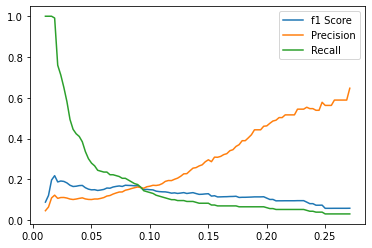

In [7]:
tcnAnomalyDetector.create_model()
tcnAnomalyDetector.create_datasets()
    
tcnAnomalyDetector.train(use_wandb=False, save_path="./")
    